<a href="https://colab.research.google.com/github/mmarin11/Colabfiles/blob/main/Practica22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Octubre 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Nombre: Manuel de Jesús Marín
*   Matrícula: 261555

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [34]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# Carga de docujmentos
df = pd.read_csv('/content/sample_data/advertising.csv')


## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.

* **Analizando las 3 gráficas de dispersión de la variables Sales vs las covariables se observa lo siguiente:**
  * **La variable TV se ve mas correlacionada a la variable ventas**
  * **La variable Radio presenta cierta correlación pero con poco más dispersa que TV**
  * **La variable Newspaper es la que presenta menor correlación con ventas**


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


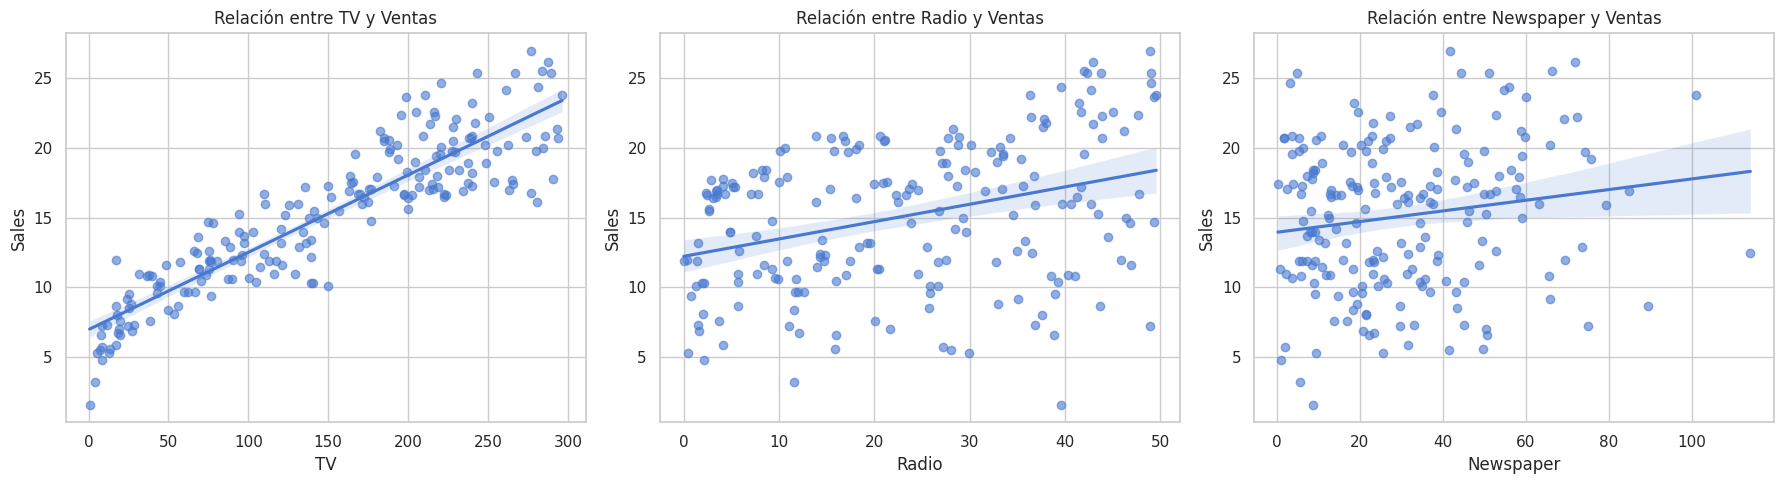

In [25]:
# Gráficos de dispersión
# Mostrar las primeras filas
print(df.head())

# --- configurar estilo gráfico ---
sns.set(style="whitegrid", palette="muted", color_codes=True)

#--- Crear gráficas de dispersión con línea de regresión ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfica 1: TV vs Sales
sns.regplot(x='TV', y='Sales', data=df, ax=axes[0], scatter_kws={'alpha':0.6})
axes[0].set_title('Relación entre TV y Ventas')

# Gráfica 2: Radio vs Sales
sns.regplot(x='Radio', y='Sales', data=df, ax=axes[1], scatter_kws={'alpha':0.6})
axes[1].set_title('Relación entre Radio y Ventas')

# Gráfica 3: Newspaper vs Sales
sns.regplot(x='Newspaper', y='Sales', data=df, ax=axes[2], scatter_kws={'alpha':0.6})
axes[2].set_title('Relación entre Newspaper y Ventas')

plt.tight_layout()
plt.show()


### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? ¿Hay correlación alta entre predictores?

  * **La variable más correlacionada con las Ventas, es TV, pesentando una correlación de **.9012** seguimo de radio con **.35** y posterior Newspapaer con **.1579**. No seobserva una correlación alta entre las covariables o variables predictoras.**


Matriz de correlación:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


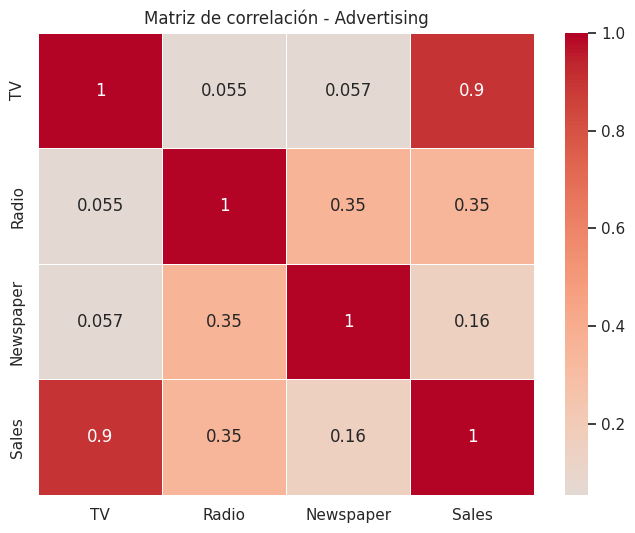

In [40]:
# Correlación y heatmap
# --- Calcular la matriz de correlación ---
corr_matrix = df.corr(numeric_only=True)
print("\nMatriz de correlación:")
print(corr_matrix)

# --- Visualizar con un heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de correlación - Advertising')
plt.show()

## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?
- ¿Qué implicaciones tiene esto para el modelo?

* **El VIF para cada una de las covariables presentan un valor cercano a 1, lo que implica que no exise multicolinealidad entre las variables predictoras, por lo que pueden ser utilizadas como parte del modelo y no requiere remover o regularizar variables.**

    Variable       VIF
0         TV  1.004611
1      Radio  1.144952
2  Newspaper  1.145187


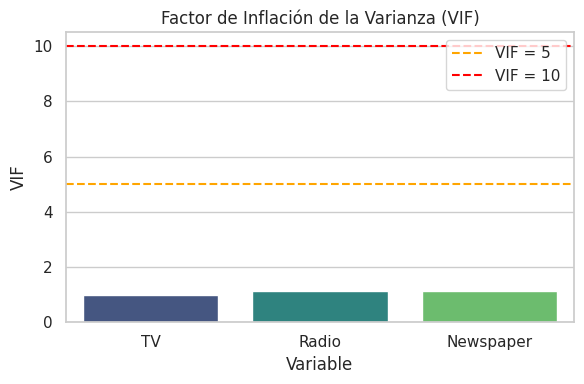

In [27]:
#Multicolinealidad
X = df[['TV', 'Radio', 'Newspaper']]


X_const = add_constant(X)


# --- Calcular el VIF para cada predictor ---
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

vif_sin_const = vif_data[vif_data["Variable"] != "const"].reset_index(drop=True)

print (vif_sin_const)


# --- Graficar el VIF ---
plt.figure(figsize=(6,4))
sns.barplot(
    x='Variable',
    y='VIF',
    data=vif_sin_const,
    hue='Variable',
    legend=False,
    palette='viridis'
)
plt.title('Factor de Inflación de la Varianza (VIF)')
plt.ylabel('VIF')
plt.xlabel('Variable')
plt.axhline(y=5, color='orange', linestyle='--', label='VIF = 5')
plt.axhline(y=10, color='red', linestyle='--', label='VIF = 10')
plt.legend()
plt.tight_layout()
plt.show()


## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

* **El B0 o Intercepto con un valor de 4.62 representa la cantidad de ventas estimadas en caso de que no exista ninguna inversión en publicidad.**
* **B1 con un valor de .054 significa el incremento en ventas por unidad de inversión en TV**
* **B2 con un valor de .1070 significa el incremento en ventas por unidad de inversión en Radio**
* **B3 con un valor de 0.0003 significa el incremento en ventas por unidad de inversión en Newspaper. Es un coeficiente muy bajo lo que significa que el gasto en periódicos no tiene un efecto claro o positivo en las ventas**


In [28]:
#Entrenamiento del Modelo (Todas las Variables Independientes)
# --- Definir variables independientes (X) y dependiente (y) ---
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# --- Crear el modelo de regresión lineal múltiple ---
model = LinearRegression()

# --- Entrenar (ajustar) el modelo ---
model.fit(X, y)

# --- Imprimir resultados ---
print("Intercepto (β₀):", model.intercept_)
print("Coeficientes (β₁, β₂, β₃):", model.coef_)

# Asociar nombres de variables con sus coeficientes
coef_table = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})
print("\nCoeficientes por variable:")
print(coef_table)


Intercepto (β₀): 4.625124078808653
Coeficientes (β₁, β₂, β₃): [0.05444578 0.10700123 0.00033566]

Coeficientes por variable:
    Variable  Coeficiente
0         TV     0.054446
1      Radio     0.107001
2  Newspaper     0.000336


### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

* **Los resudios tienen una media cercana a 0 lo que significa que el modelo no está subestimando o sobrestimando las ventas**

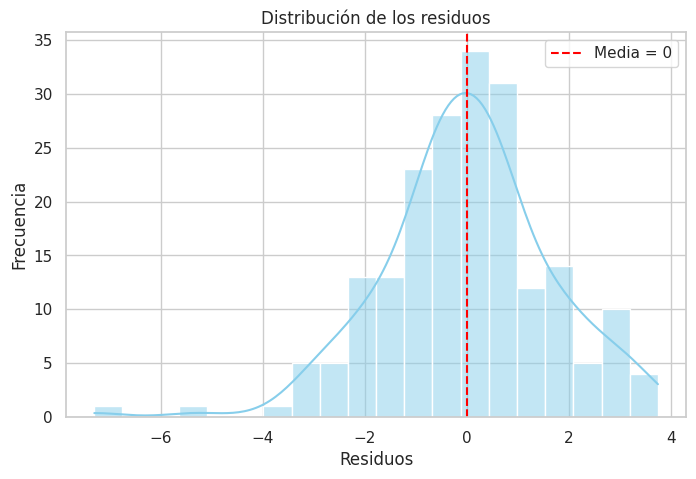

count    2.000000e+02
mean    -2.660094e-15
std      1.649122e+00
min     -7.303405e+00
25%     -8.244205e-01
50%     -7.775337e-04
75%      8.976299e-01
max      3.747280e+00
Name: Sales, dtype: float64


In [31]:
#Normalidad de los
# --- Calcular predicciones y residuos ---
y_pred = model.predict(X)
residuos = y - y_pred

# --- Graficar histograma con KDE (curva de densidad) ---
plt.figure(figsize=(8,5))
sns.histplot(residuos, kde=True, bins=20, color='skyblue')
plt.title('Distribución de los residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.axvline(0, color='red', linestyle='--', label='Media = 0')
plt.legend()
plt.show()

# --- Revisar resumen estadístico de los residuos ---
print(residuos.describe())

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?
  * **Los residuos se dispersan de forma aleatoria alrededor de la línea horizontal (0). No se observa una forma cónica (embudo), curva o patrón sistemático.Esto indica que la varianza de los errores es aproximadamente constante, es decir, se cumple la homocedasticidad**


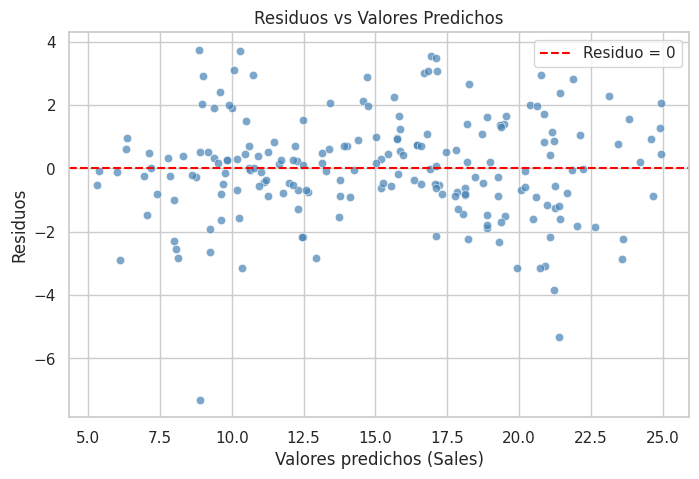

In [32]:
# Homocedasticidad

# --- Definir variables ---
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# --- Entrenar el modelo ---
model = LinearRegression()
model.fit(X, y)

# --- Calcular valores predichos y residuos ---
y_pred = model.predict(X)
residuos = y - y_pred

# --- Graficar residuos vs valores predichos ---
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuos, color='steelblue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', label='Residuo = 0')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores predichos (Sales)')
plt.ylabel('Residuos')
plt.legend()
plt.show()



### Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico:
* **Los puntos se alinean bastante bien con la línea diagonal,
lo que indica que los residuos siguen una distribución aproximadamente normal**

<Figure size 600x600 with 0 Axes>

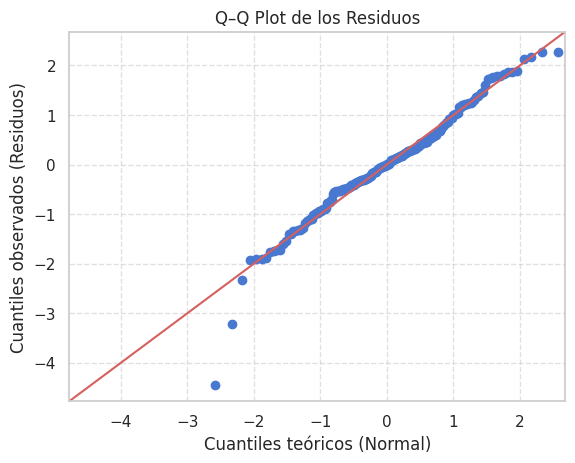

In [35]:
## --- Graficar Q–Q Plot ---
plt.figure(figsize=(6,6))
sm.qqplot(residuos, line='45', fit=True)
plt.title('Q–Q Plot de los Residuos')
plt.xlabel('Cuantiles teóricos (Normal)')
plt.ylabel('Cuantiles observados (Residuos)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?

**Los varlores son**:

* Error cuadrático medio **(MSE): 2.7060** Promedio del cuadrado de los errores (residuos). Penaliza los errores grandes.Cuanto menor sea, mejor. En este caso, 2.70 significa que, en promedio, el modelo comete un error cuadrático de 2.70 unidades cuadradas en ventas.

* Raíz del error cuadrático medio **(RMSE): 1.6450** Raíz cuadrada del MSE. Representa el error promedio en las mismas unidades de la variable dependiente (Sales).RMSE ≈ 1.64 → el modelo predice las ventas con un error promedio de ±1.64 unidades (miles de ventas).


* Coeficiente de determinación **(R²): 0.9026** Proporción de la variabilidad de Sales explicada por el modelo. El modelo explica el 90.26% de la variabilidad en las ventas. Solo ~10% queda sin explicar (ruido o factores externos).




In [36]:
#Evaluación del Modelo

# --- Definir variables ---
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# --- Entrenar el modelo ---
model = LinearRegression()
model.fit(X, y)

# ---Calcular predicciones ---
y_pred = model.predict(X)

# --- Calcular métricas de evaluación ---
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

Error cuadrático medio (MSE): 2.7060
Raíz del error cuadrático medio (RMSE): 1.6450
Coeficiente de determinación (R²): 0.9026


### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?

	*	Los puntos se alinean cerca de la línea roja diagonal (y = x).
	*	Esto indica que el modelo predice correctamente la mayoría de los valores.
	*	Las desviaciones pequeñas alrededor de la línea implican errores aleatorios.

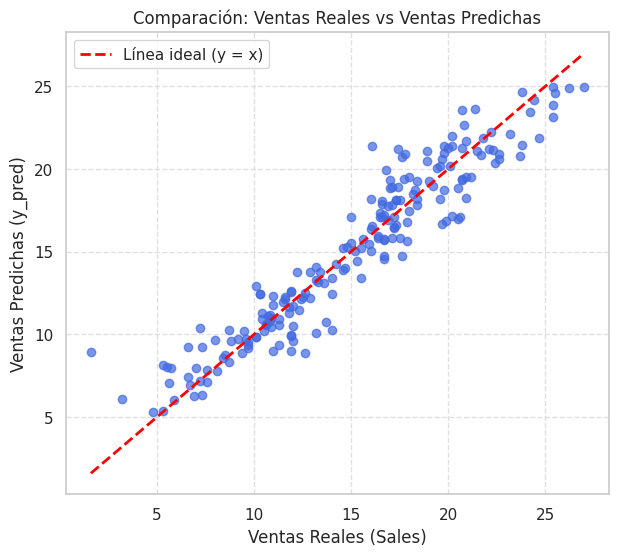

In [37]:
#Visualización de las Predicciones

# Calcular predicciones ---
y_pred = model.predict(X)

# --- Graficar comparación entre valores reales y predichos ---
plt.figure(figsize=(7,6))
plt.scatter(y, y_pred, color='royalblue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label='Línea ideal (y = x)')
plt.title('Comparación: Ventas Reales vs Ventas Predichas')
plt.xlabel('Ventas Reales (Sales)')
plt.ylabel('Ventas Predichas (y_pred)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?

    * Las varianles que tienen un p-value <.05 son **Radio y Television**

 - ¿Cuál es la conclusión sobre esas variables?

    * Cuando el p-value es </05, significa que **son variables que influyen en la varibale a predecir por lo cual no pueden ser descartadas**. Cauando p-value es >.1 se considera variables no significativa por lo cuala podría descartarse en el modelo


In [38]:
#P-values
# --- Definir variables independientes (X) y dependiente (y) ---
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# --- Agregar constante (intercepto) ---
X = sm.add_constant(X)

# --- Ajustar el modelo con statsmodels ---
model = sm.OLS(y, X).fit()

# --- Mostrar resumen completo del modelo ---
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 19 Oct 2025   Prob (F-statistic):           8.13e-99
Time:                        20:51:22   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

**Nota: No se detectan variables con multicolinealidad ya que en el análisis el valor de VIF es <5**

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.




In [39]:


# Variable dependiente
y = df['Sales']

# Modelos
X_full = df[['TV', 'Radio', 'Newspaper']]
X_reduced = df[['TV', 'Radio']]

# --- Funciones utilitarias ---
def fit_sklearn_and_metrics(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    n = len(y)
    p = X.shape[1]
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return {
        'model': model,
        'y_pred': y_pred,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'R2_adj': r2_adj
    }

def fit_statsmodels(X, y):
    Xc = sm.add_constant(X)
    ols = sm.OLS(y, Xc).fit()
    return ols

# --- Ajustar modelos (sklearn) y evaluar ---
res_full = fit_sklearn_and_metrics(X_full, y)
res_red  = fit_sklearn_and_metrics(X_reduced, y)

# --- Comparar métricas ---
compare = pd.DataFrame({
    'MSE':   [res_full['MSE'],   res_red['MSE']],
    'RMSE':  [res_full['RMSE'],  res_red['RMSE']],
    'R2':    [res_full['R2'],    res_red['R2']],
    'R2_adj':[res_full['R2_adj'],res_red['R2_adj']],
}, index=['Con Newspaper (TV+Radio+Newspaper)', 'Sin Newspaper (TV+Radio)'])

print('=== Comparación de métricas (in-sample) ===')
print(compare.round(4))

# --- Coeficientes de sklearn ---
coef_full = pd.Series(res_full['model'].coef_, index=X_full.columns, name='Coeficiente')
coef_red  = pd.Series(res_red['model'].coef_,  index=X_reduced.columns, name='Coeficiente')

print('\n=== Coeficientes (sklearn) — Modelo con Newspaper ===')
print(coef_full.round(4))
print('\n=== Coeficientes (sklearn) — Modelo sin Newspaper ===')
print(coef_red.round(4))

# --- Ajustar con statsmodels para p-values ---
ols_full = fit_statsmodels(X_full, y)
ols_red  = fit_statsmodels(X_reduced, y)

print('\n=== P-values (statsmodels) — Modelo con Newspaper ===')
print(ols_full.pvalues.round(4))  # incluye const, TV, Radio, Newspaper

print('\n=== P-values (statsmodels) — Modelo sin Newspaper ===')
print(ols_red.pvalues.round(4))   # incluye const, TV, Radio



# --- Conclusión automática breve ---
sig_full = ols_full.pvalues[ols_full.pvalues.index != 'const'].lt(0.05)
sig_red  = ols_red.pvalues[ols_red.pvalues.index != 'const'].lt(0.05)

print('\n=== Conclusión breve ===')
if compare.loc['Sin Newspaper (TV+Radio)', 'R2_adj'] >= compare.loc['Con Newspaper (TV+Radio+Newspaper)', 'R2_adj'] - 1e-6:
    print('El modelo SIN Newspaper es preferible: mantiene (o mejora levemente) el R² ajustado con menos variables.')
else:
    print('El modelo CON Newspaper muestra mejor R² ajustado (poco común en este dataset).')

print('Variables significativas (p<0.05) con Newspaper:', list(sig_full[sig_full].index))
print('Variables significativas (p<0.05) sin Newspaper:', list(sig_red[sig_red].index))

=== Comparación de métricas (in-sample) ===
                                       MSE   RMSE      R2  R2_adj
Con Newspaper (TV+Radio+Newspaper)  2.7060  1.645  0.9026  0.9011
Sin Newspaper (TV+Radio)            2.7061  1.645  0.9026  0.9016

=== Coeficientes (sklearn) — Modelo con Newspaper ===
TV           0.0544
Radio        0.1070
Newspaper    0.0003
Name: Coeficiente, dtype: float64

=== Coeficientes (sklearn) — Modelo sin Newspaper ===
TV       0.0544
Radio    0.1072
Name: Coeficiente, dtype: float64

=== P-values (statsmodels) — Modelo con Newspaper ===
const        0.0000
TV           0.0000
Radio        0.0000
Newspaper    0.9538
dtype: float64

=== P-values (statsmodels) — Modelo sin Newspaper ===
const    0.0
TV       0.0
Radio    0.0
dtype: float64

=== Conclusión breve ===
El modelo SIN Newspaper es preferible: mantiene (o mejora levemente) el R² ajustado con menos variables.
Variables significativas (p<0.05) con Newspaper: ['TV', 'Radio']
Variables significativas (p<0.05)

##7. Conclusiones.

¿Cuál de los tres modelos construidos fue el mejor?
¿Cuál fue el atributo que mas influencia tiene en las ventas?

* El mejor modelo es el toma en cuenta sola las variables de Radio y Televisión ya que aumenta ligeramente el valor de R2 y se elimina una variable dejando un modelo más simple. **La variable mas influyente en el modelo es la  de inversión en televisión**, que aunque tiene un coeficiente más bajo que radio, la escala de inversión es mayor.